**What is Exploratory Data Analysis (EDA)?**
Exploratory Data Analysis (EDA) involves understanding data sets by summarizing their key features, often using visualizations. EDA is crucial before applying machine learning models because it helps to identify patterns, spot anomalies, and gain insights from the data. Common visualization techniques include histograms, box plots, and scatter plots, among others. Although EDA can be time-consuming, it’s a critical step in formulating a problem statement or understanding the data’s structure and behavior, setting the stage for effective modeling.
How to Perform Exploratory Data Analysis (EDA)?

**How to perform EDA?**
Many people wonder how to effectively perform EDA, but the truth is, it largely depends on the specific dataset you are working with. There isn't a single, universal method for EDA; instead, it requires a flexible approach tailored to the data’s characteristics. However, in this tutorial, we’ll cover some common techniques and plots frequently used in EDA, such as descriptive statistics, histograms, box plots, scatter plots, and more, to help you gain meaningful insights from your data.

**What are we exploring today?**
We’re analyzing data from the New York City Bike Share program, which offers convenient and affordable bike trips across New York City’s boroughs. Through this EDA, we aim to uncover trends, understand usage patterns, and gain insights that can inform future decisions or modeling efforts.

![](http://)

In [82]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

First, let's load our data into a DataFrame using pd.read_csv(). This function reads the data from the CSV file located in the specified path and stores it in the variable df. Now, df holds all the bike-share data from New York City, collected between 2015 and 2017.

In [83]:
import pandas as pd
df = pd.read_csv("C:/Users/Workstation/Downloads/NYC-BikeShare-2015-2017-combined.csv")

Next, we're removing a column named 'Unnamed: 0'. This column is likely an unnecessary index column created during data export, so we don’t need it. We use df.drop() to remove it, specifying axis=1 to drop a column (not a row) and inplace=True to make the change directly to df.

In [84]:
df.drop("Unnamed: 0",axis=1,inplace =True)

Finally, we use df.head() to display the first 5 rows of our DataFrame. This gives us a quick snapshot of our data, so we can see what it looks like and start understanding the structure of the dataset, such as column names and sample values.

In [85]:
df.head(5)

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,Trip_Duration_in_min
0,376,2015-10-01 00:16:26,2015-10-01 00:22:42,3212,Christ Hospital,40.734786,-74.050444,3207,Oakland Ave,40.737604,-74.052478,24470,Subscriber,1960.0,1,6
1,739,2015-10-01 00:27:12,2015-10-01 00:39:32,3207,Oakland Ave,40.737604,-74.052478,3212,Christ Hospital,40.734786,-74.050444,24481,Subscriber,1960.0,1,12
2,2714,2015-10-01 00:32:46,2015-10-01 01:18:01,3193,Lincoln Park,40.724605,-74.078406,3193,Lincoln Park,40.724605,-74.078406,24628,Subscriber,1983.0,1,45
3,275,2015-10-01 00:34:31,2015-10-01 00:39:06,3199,Newport Pkwy,40.728745,-74.032108,3187,Warren St,40.721124,-74.038051,24613,Subscriber,1975.0,1,5
4,561,2015-10-01 00:40:12,2015-10-01 00:49:33,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,24668,Customer,1984.0,0,9


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735502 entries, 0 to 735501
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Trip Duration            735502 non-null  int64  
 1   Start Time               735502 non-null  object 
 2   Stop Time                735502 non-null  object 
 3   Start Station ID         735502 non-null  int64  
 4   Start Station Name       735502 non-null  object 
 5   Start Station Latitude   735502 non-null  float64
 6   Start Station Longitude  735502 non-null  float64
 7   End Station ID           735502 non-null  int64  
 8   End Station Name         735502 non-null  object 
 9   End Station Latitude     735502 non-null  float64
 10  End Station Longitude    735502 non-null  float64
 11  Bike ID                  735502 non-null  int64  
 12  User Type                735502 non-null  object 
 13  Birth Year               735502 non-null  float64
 14  Gend

**Let's start EDA**

In [87]:
df.shape

(735502, 16)

**There are 16 columns and 735502 rows in the dataset.**

Let's first check if we have any duplicates. The first sep - is to clear our dataset from duplicates.

In [88]:
df.drop_duplicates(inplace=True)

1. drop_duplicates(): This function removes duplicate rows from the DataFrame.
1. inplace=True: This modifies the original DataFrame directly, so you don't have to reassign it.

In [89]:
df.shape

(339620, 16)

Afer deduplication, we have just 339,620 records in the dataset left.

**Descriptive Statistics**
* Mean: The average value of a dataset.
* Median: The middle value when the data is sorted.
* Mode: The most frequently occurring value.
* Standard Deviation: Measures how spread out the data is from the mean.
* Range: The difference between the maximum and minimum values.

In [90]:
mean_duration = df['Trip Duration'].mean()
median_duration = df['Trip Duration'].median()
mode_duration = df['Trip Duration'].mode()[0]
std_dev_duration = df['Trip Duration'].std()  # Standard Deviation
range_durtion = df['Trip Duration'].max() - df['Trip Duration'].min()  # Range
print("Mean:", mean_duration, "Median:", median_duration, "Mode:", mode_duration,"Std Dev:", std_dev_duration, "Range :", range_durtion)

Mean: 962.9629203227137 Median: 384.0 Mode: 244 Std Dev: 48685.70128924114 Range : 20260150


**Based on the descriptive statistics of the Trip Duration data:**

* **Mean** (962.96 seconds): The average trip duration is about 16 minutes, suggesting that, on average, bike trips are relatively short.
* **Median** (384 seconds): The median trip duration is around 6.4 minutes, indicating that half of the bike trips are shorter than this time, showing that most trips are relatively brief.
* **Mode** (244 seconds): The most common trip duration is 244 seconds (about 4 minutes), reflecting a large number of quick bike trips.
* **Standard Deviation** (48,685.70 seconds): The data shows a high variability in trip durations, with some trips being significantly longer or shorter than the mean.
* **Range** (20,260,150 seconds): The enormous range indicates that there are still some extremely long trips, suggesting the presence of outliers that greatly extend the duration spread.
* **Overall Insights:**
* Most bike trips are short and consistent, but there are a few extremely long trips causing a large spread in the data.
* It would be valuable to investigate these outliers further to understand their nature and decide if they should be treated differently in your analysis.

In [91]:
df['Trip Duration'].max()

np.int64(20260211)

**Data Distribution Analysis**
Why We Do It:
The goal of data distribution analysis is to understand how the values of a variable, like trip duration, are spread across the dataset. This helps us identify patterns, such as whether most trips are short or if there are many long trips, and to detect any extreme values (outliers) that could affect our analysis.

**Histogram**

Purpose: A histogram helps us see how frequently different values of trip duration occur. It shows whether the data is skewed (more data points on one side) or normally distributed.

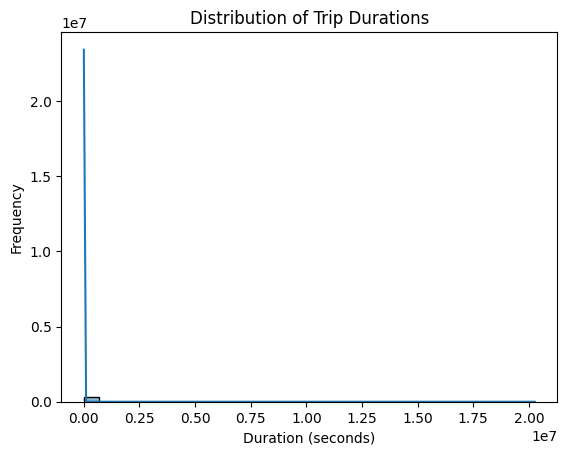

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a histogram of trip duration
sns.histplot(df['Trip Duration'], bins=30, kde=True)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()


sns.histplot: Plots a histogram of the Trip Duration column, dividing it into 30 bins (groups).

bins=30: Specifies the number of bars or intervals in the histogram.
kde=True: Adds a smooth curve (Kernel Density Estimate) over the histogram to show the overall shape of the data.
plt.title: Adds a title, "Distribution of Trip Durations," to describe the chart.

plt.xlabel and plt.ylabel: Label the x-axis as "Duration (seconds)" and y-axis as "Frequency" to clarify what the axes represent.

plt.show: Displays the plot.
*A histogram is a visual representation of the distribution of quantitative data.*


In [93]:
# Example: Filtering out trip durations longer than a reasonable threshold
df_filtered = df[df['Trip Duration'] > 1269.5]  # Adjust the threshold as needed
df_filtered.tail(10)


,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,Trip_Duration_in_min
378081,1291,2015-09-30 20:32:40,2015-09-30 20:54:11,3212,Christ Hospital,40.734786,-74.050444,3212,Christ Hospital,40.734786,-74.050444,24403,Subscriber,1977.0,1,22
378086,1380,2015-09-30 20:41:07,2015-09-30 21:04:07,3183,Exchange Place,40.716247,-74.033459,3186,Grove St PATH,40.719586,-74.043117,24421,Subscriber,1976.0,1,23
378098,1719,2015-09-30 20:56:41,2015-09-30 21:25:21,3199,Newport Pkwy,40.728745,-74.032108,3211,Newark Ave,40.721525,-74.046305,24412,Subscriber,1991.0,1,29
378104,2136,2015-09-30 21:05:12,2015-09-30 21:40:48,3209,Brunswick St,40.724176,-74.050656,3209,Brunswick St,40.724176,-74.050656,24436,Subscriber,1975.0,1,36
378107,1941,2015-09-30 21:09:45,2015-09-30 21:42:06,3211,Newark Ave,40.721525,-74.046305,3199,Newport Pkwy,40.728745,-74.032108,24662,Subscriber,1985.0,1,32
378112,1481,2015-09-30 21:20:10,2015-09-30 21:44:52,3185,City Hall,40.717732,-74.043845,3202,Newport PATH,40.727224,-74.033759,24476,Subscriber,1988.0,2,25
378120,1286,2015-09-30 21:54:40,2015-09-30 22:16:07,3201,Dey St,40.737711,-74.066921,3215,Central Ave,40.746730,-74.049251,24428,Subscriber,1987.0,1,21
378122,1812,2015-09-30 21:56:44,2015-09-30 22:26:56,3183,Exchange Place,40.716247,-74.033459,3183,Exchange Place,40.716247,-74.033459,24421,Subscriber,1992.0,1,30
378138,7992,2015-09-30 22:57:53,2015-10-01 01:11:06,3187,Warren St,40.721124,-74.038051,3187,Warren St,40.721124,-74.038051,24714,Customer,1984.0,0,133
378147,2415,2015-09-30 23:51:46,2015-10-01 00:32:01,3199,Newport Pkwy,40.728745,-74.032108,3199,Newport Pkwy,40.728745,-74.032108,24613,Subscriber,1975.0,1,40


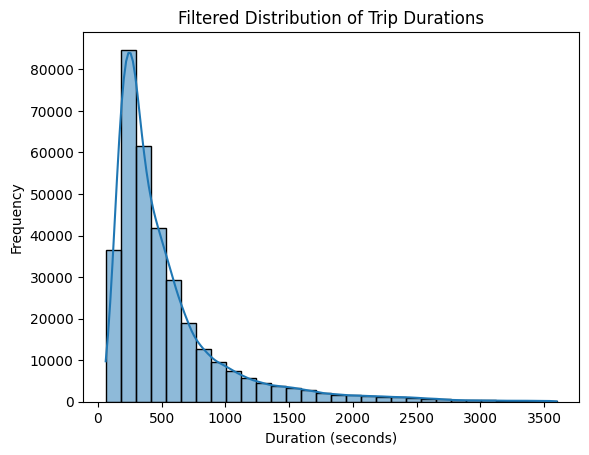

In [94]:

# Example: Filtering out trip durations longer than a reasonable threshold
df_filtered = df[df['Trip Duration'] < 3600]  # Adjust the threshold as needed
sns.histplot(df_filtered['Trip Duration'], bins=30, kde=True)
plt.title('Filtered Distribution of Trip Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

**Box Plot**

Purpose: A box plot helps us visualize the spread of the data and detect outliers. It shows the median (middle value), quartiles, and outliers.

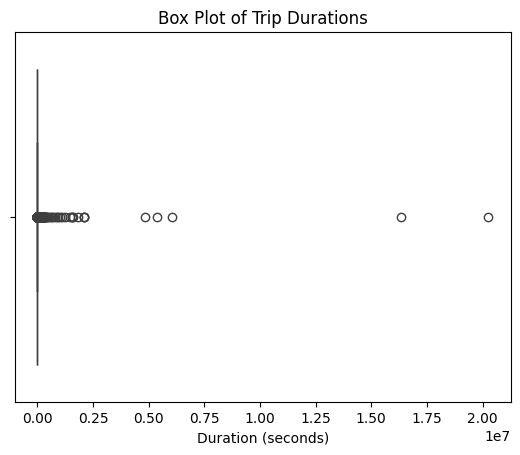

In [95]:
sns.boxplot(x=df['Trip Duration'])
plt.title('Box Plot of Trip Durations')
plt.xlabel('Duration (seconds)')
plt.show()

sns.boxplot: Plots a box plot for the Trip Duration column.

A box plot shows the median, quartiles, and potential outliers in the data.
plt.title: Adds the title "Box Plot of Trip Durations" to describe the plot.

plt.xlabel: Labels the x-axis as "Duration (seconds)" to clarify what the data represents.

plt.show: Displays the plot.

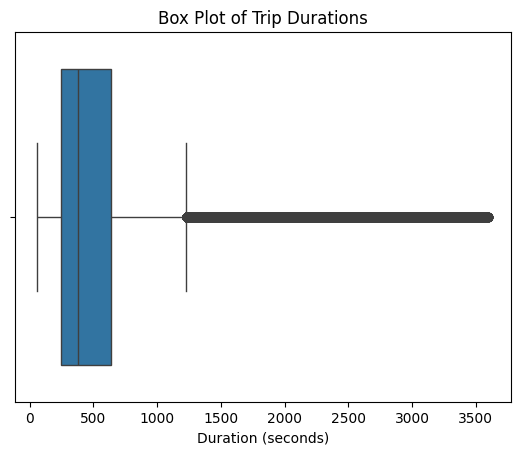

In [96]:
df_filtered = df[df['Trip Duration'] < 3600]  # Adjust the threshold as needed
sns.boxplot(x=df_filtered['Trip Duration'])
plt.title('Box Plot of Trip Durations')
plt.xlabel('Duration (seconds)')
plt.show()

The box plot shows where most of the data points lie and highlights outliers that may need further investigation. The "box" represents the middle 50% of the data (interquartile range), and the "whiskers" extend to show the rest of the data, except for outliers.

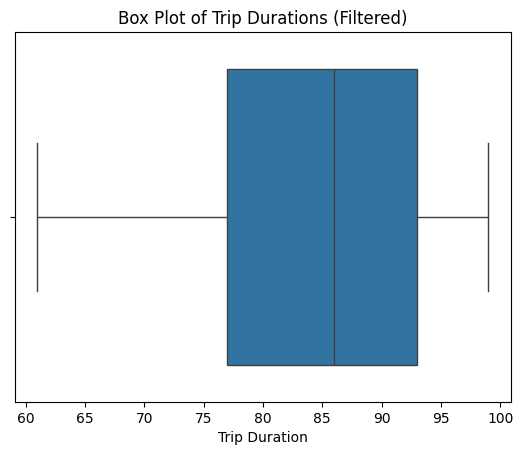

In [97]:
# Example: Filtering out extremely long trips
df_filtered = df[df['Trip Duration'] < 100]  # Adjust the threshold as needed
sns.boxplot(x=df_filtered['Trip Duration'])
plt.title('Box Plot of Trip Durations (Filtered)')
plt.show()


Let's take a look at the values sorted by Trip Duration in descending order.

In [98]:
# Add a new column 'Trip Duration in Hours' by converting seconds to hours
df['Trip Duration(hrs)'] = df['Trip Duration'] / 3600

# Sort the DataFrame by 'Trip Duration' in descending order and select the top 30
top_50_max_duration = df.sort_values(by='Trip Duration', ascending=False).head(50)

# Select only the relevant columns, including the new 'Trip Duration in Hours'
top_50_max_duration = top_50_max_duration[['Trip Duration', 'Trip Duration(hrs)', 'Start Time', 'Stop Time']]

# Display the updated DataFrame
print(top_50_max_duration)



        Trip Duration  Trip Duration(hrs)           Start Time  \
374349       20260211         5627.836389  2015-09-26 04:20:59   
109375       16329808         4536.057778  2016-03-22 07:02:10   
78142         6065936         1684.982222  2015-12-12 21:04:35   
71700         5366099         1490.583056  2015-11-27 13:49:07   
313891        4826890         1340.802778  2016-11-23 17:38:36   
95455         2104123          584.478611  2016-02-12 07:27:56   
95491         2100551          583.486389  2016-02-12 08:31:06   
95593         2071209          575.335833  2016-02-12 16:32:54   
128729        1837255          510.348611  2016-04-28 09:05:14   
8191          1620142          450.039444  2015-10-13 23:52:48   
87178         1569765          436.045833  2016-01-09 05:49:39   
243701        1532001          425.555833  2016-09-11 16:32:21   
7135          1471896          408.860000  2015-10-12 16:29:28   
226371        1258736          349.648889  2016-08-26 23:19:01   
235239    

**Unusually Long Durations:**
The trip durations in the top 30 range from 496,680 seconds (about 5.7 days) to 20,260,211 seconds (about 234 days). For a bike-sharing service, this duration is extraordinarily long. Most bike trips typically last from a few minutes to a few hours, not multiple days.
Suspicious Patterns:
The start and stop times for these trips span multiple days, weeks, or even months. This suggests that these trips could be due to data errors, such as trips that were not properly checked back in or recorded.

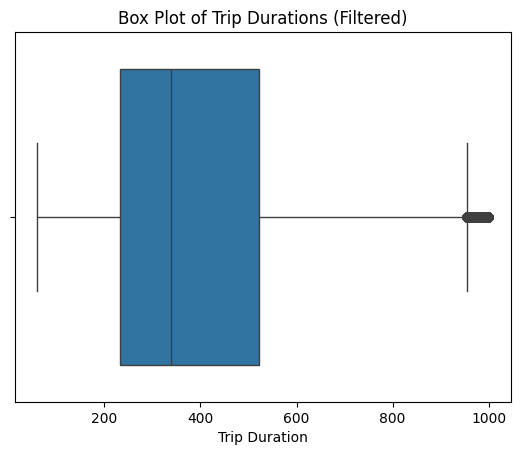

In [99]:
#2104123
# Example: Filtering out extremely long trips
df_filtered = df[df['Trip Duration'] < 1000]  # Adjust the threshold as needed
sns.boxplot(x=df_filtered['Trip Duration'])
plt.title('Box Plot of Trip Durations (Filtered)')
plt.show()


# How to get rid of outlers?

The Quartile Method, also known as the Interquartile Range (IQR) Method, is commonly used to identify and remove outliers from a dataset.

Q1 (First Quartile): Imagine you have all your trip durations lined up from shortest to longest. Q1 is the point where 25% of the trips are shorter, and 75% are longer. It's like the mark where the first quarter of your data ends.

Q3 (Third Quartile): Q3 is the point where 75% of the trips are shorter, and only 25% are longer. It's the mark where three-quarters of your data is below it, and only the top quarter is above.

IQR (Interquartile Range): The IQR is the space between Q1 and Q3. It tells us how spread out the middle half of the trips are. So, if the IQR is small, most trips are of similar duration. If it’s big, the trip durations are more spread out.

Think of it like dividing your trip data into four equal parts: Q1 is the end of the first part, Q3 is the end of the third part, and the IQR is the chunk in between where the bulk of your data sits.

In [100]:
Q1 = df['Trip Duration'].quantile(0.25)# 25th quartile
Q3 = df['Trip Duration'].quantile(0.75)# 75th quartile
IQR = Q3 - Q1
print("IQR:",IQR,"Q1:",Q1,"Q3:",Q3)

IQR: 409.0 Q1: 247.0 Q3: 656.0


**Q1 (25th percentile): 247 seconds (about 4.1 minutes)**

**Q3 (75th percentile): 656 seconds (about 10.9 minutes)**

**IQR (Interquartile Range): 409 seconds (Q3 - Q1)**

Using These Values to Identify Outliers:
We can use the IQR to calculate the lower and upper bounds for detecting outliers:

Calculate the Bounds:

**Lower Bound:**
Q1−1.5×IQR=247−1.5×409=247−613.5=−366.5
Since trip duration cannot be negative, the lower bound will be 0.

**Upper Bound:**
Q3+1.5×IQR=656+1.5×409=656+613.5=1269.5

Interpretation:

Any trip duration **below 0 seconds (which is impossible in this context) 
or above 1269.5 seconds** (about 21.2 minutes) is considered an outlier.

In [101]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Trip Duration'] < lower_bound) | (df['Trip Duration'] > upper_bound)]
print("outliers: trips longer than",upper_bound)


outliers: trips longer than 1269.5


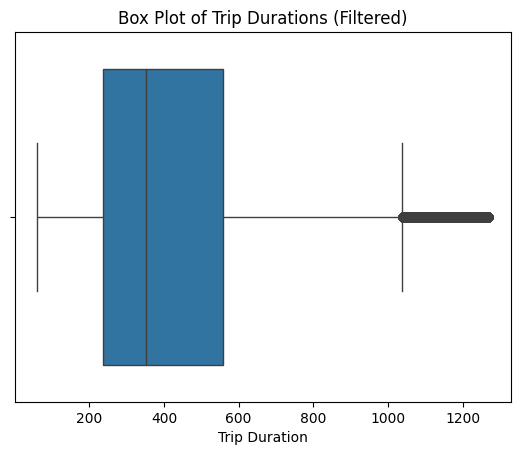

In [102]:
#1269.5
# Example: Filtering out extremely long trips
df_filtered = df[df['Trip Duration'] <= 1269.5]  # Adjust the threshold as needed
sns.boxplot(x=df_filtered['Trip Duration'])
plt.title('Box Plot of Trip Durations (Filtered)')
plt.show()


In [103]:
mean_duration = df_filtered['Trip Duration'].mean()
median_duration = df_filtered['Trip Duration'].median()
mode_duration = df_filtered['Trip Duration'].mode()[0]
std_dev_duration = df_filtered['Trip Duration'].std()  # Standard Deviation
range_durtion = df_filtered['Trip Duration'].max() - df_filtered['Trip Duration'].min()  # Range
print("Mean:", mean_duration, "Median:", median_duration, "Mode:", mode_duration,"Std Dev:", std_dev_duration, "Range :", range_durtion)

Mean: 428.31488306922654 Median: 353.0 Mode: 244 Std Dev: 257.843141266675 Range : 1208


In [104]:
median = df_filtered['Trip Duration'].median()
mean = df_filtered['Trip Duration'].mean()
mode = df_filtered['Trip Duration'].mode()[0]
std_trip = df_filtered['Trip Duration'].std()
range_trip = df_filtered['Trip Duration'].max() - df_filtered['Trip Duration'].min()
print("Median:",median,"Mean:",mean,"Mode:" , mode,"Std:", std_trip,"Range:", range_trip)

Median: 353.0 Mean: 428.31488306922654 Mode: 244 Std: 257.843141266675 Range: 1208


**Median: 353.0 seconds (about 5.88 minutes)**

The median represents the middle value of the trip durations, indicating that half of the bike trips are less than 353 seconds and the other half are more than 353 seconds. This suggests that many bike trips are fairly short.
Mean: 428.31 seconds (about 7.14 minutes)

**The mean (average) trip duration is 428.31 seconds.** Since the mean is higher than the median, it suggests that there are some longer trips that are pulling the average up, though they are not as extreme as the original outliers before cleaning.
Mode: 244 seconds (about 4.07 minutes)

The mode is 244 seconds, meaning this is the most frequently occurring trip duration. Many bike trips are around 4 minutes, highlighting a common use pattern for short rides.

**Standard Deviation: 257.84 seconds**

The standard deviation measures the spread of the trip durations. A value of 257.84 seconds indicates there is still a moderate amount of variation, but it is more reasonable than before outlier removal. Most trips fall within a range of about 4 minutes from the mean.
Range: 1208 seconds (about 20.13 minutes)

**The range is 1208 seconds**, showing the difference between the longest and shortest trips in the filtered dataset. This confirms that, even after cleaning, there is still some variation in trip durations, but the data now reflects a more typical and expected usage pattern.

**Insights:**

**The median and mode indicate that most bike trips are short, commonly around 4 to 6 minutes.
The mean being slightly higher than the median suggests that there are still a few longer trips influencing the average, but they are not excessively skewing the data.
The cleaned dataset now gives a clearer understanding of bike-sharing behavior, showing that the service is mostly used for short trips, with occasional longer ones.**

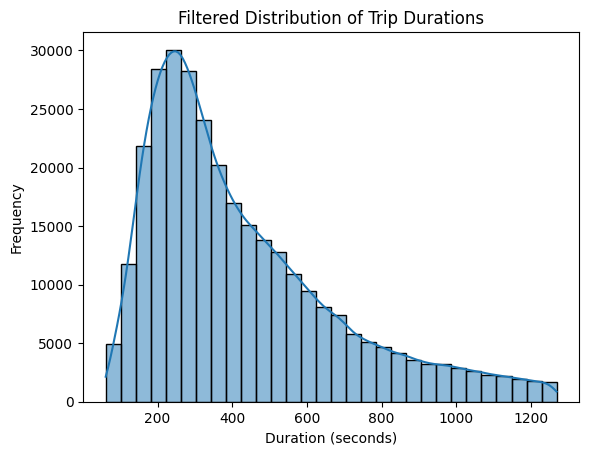

In [105]:

# Example: Filtering out trip durations longer than a reasonable threshold
#df_filtered = df[df['Trip Duration'] < 3600]  # Adjust the threshold as needed
sns.histplot(df_filtered['Trip Duration'], bins=30, kde=True)
plt.title('Filtered Distribution of Trip Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

This histogram represents the filtered distribution of trip durations. Here's how to interpret it:

**Shape of the Distribution:**

The distribution is right-skewed, meaning that most bike trips are short in duration, and as the duration increases, the number of trips decreases.
The peak of the histogram occurs around 200-300 seconds (3.3 to 5 minutes), indicating that most bike trips are concentrated around this duration.
Frequency:

The y-axis shows the frequency of trip durations, with the highest frequency reaching around 30,000 trips. This indicates that a large number of bike trips are in the shorter duration range.
As the duration increases beyond 300 seconds, the frequency steadily decreases, showing that longer trips are less common.
Tail of the Distribution:

The right tail extends up to around 1200 seconds (20 minutes), with relatively fewer trips occurring in this range. This confirms that while some longer trips still occur, they are much less frequent compared to the shorter ones.

**Insights:**

The majority of bike trips are short, typically between 3 to 7 minutes, which is consistent with the nature of a bike-sharing service meant for quick rides.
The right-skewed nature of the data suggests that there are still some longer trips, but they are not as extreme as the original outliers.
This distribution helps us understand typical usage patterns and indicates that most users prefer short-duration rides.

In [106]:
df_filtered.shape
df = df_filtered #replacing our dataset with the new one cleaned from outliers

In [107]:
# Count the total number of records and the number of 'Subscriber' user types
total_users = df.shape[0]
subscriber_count = df[df['User Type'] == 'Subscriber'].shape[0]
customer_count = df[df['User Type'] == 'Customer'].shape[0]

# Calculate the percentage of 'Subscriber' user types
subscriber_percentage = round((subscriber_count / total_users) * 100,2)
customer_percentage = round((customer_count / total_users) * 100,2)
print("Percentage of Subscribers:", subscriber_percentage, "%, while just", customer_percentage,"% is not subscribed")


Percentage of Subscribers: 96.06 %, while just 3.94 % is not subscribed


# **How does trip number vary on user type?**

In [108]:
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'plotly'

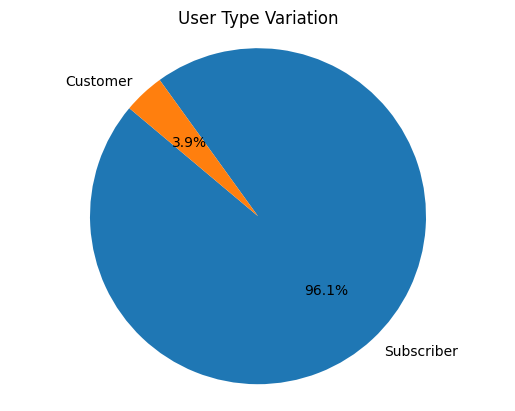

In [ ]:
values = df['User Type'].value_counts()
labels = df['User Type'].value_counts().index

# Plot the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title("User Type Variation")

# Show the chart
plt.axis('equal')  # Ensures the pie chart is circular
plt.show()

# **How does trip number vary based on gender?**
**We are starting with cleaned from outliers data**

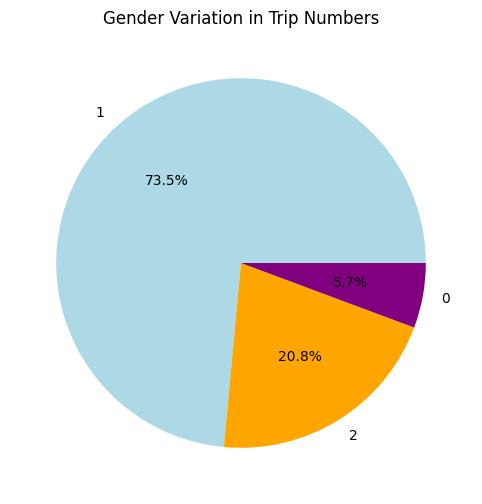

In [ ]:
gender_counts = df['Gender'].value_counts()

# Extract values and labels for the pie chart
values = gender_counts.values
labels = gender_counts.index

# Create the pie chart
plt.figure(figsize=(8, 6))  # Optional: Adjust the figure size
plt.pie(
    values,
    labels=labels,
    autopct='%1.1f%%',  # Display percentages with 1 decimal place
    startangle=0,  # Rotate the start of the pie chart
    colors=['lightblue', 'orange', 'purple'],  # Optional: Custom slice colors
    shadow=False  # Optional: Add a shadow
)

# Add a title
plt.title("Gender Variation in Trip Numbers")

# Display the chart
plt.show()

In [ ]:
# Group the data by 'Gender' and calculate summary statistics for 'Trip Duration'
gender_summary = df.groupby('Gender')['Trip Duration'].agg(['mean', 'median', 'count'])

# Rename the columns for clarity
gender_summary.rename(columns={'mean': 'Average Trip Duration', 'median': 'Median Trip Duration', 'count': 'Number of Trips'}, inplace=True)

# Display the summary statistics
print(gender_summary)


        Average Trip Duration  Median Trip Duration  Number of Trips
Gender                                                              
0                  610.041766                 562.0            17550
1                  412.166980                 336.0           227201
2                  435.774869                 372.0            64278


              mean  median
Gender                    
0       610.041766   562.0
1       412.166980   336.0
2       435.774869   372.0


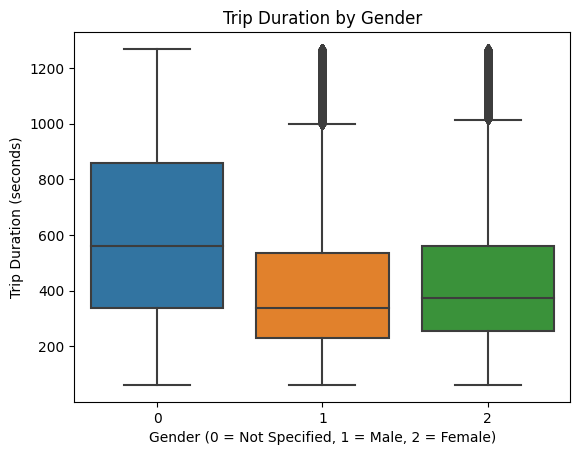

In [ ]:
# Calculate average and median trip durations by gender
gender_trip_duration = df_filtered.groupby('Gender')['Trip Duration'].agg(['mean', 'median'])
print(gender_trip_duration)

# Visualize with a box plot
sns.boxplot(x='Gender', y='Trip Duration', data=df_filtered)
plt.title('Trip Duration by Gender')
plt.xlabel('Gender (0 = Not Specified, 1 = Male, 2 = Female)')
plt.ylabel('Trip Duration (seconds)')
plt.show()


Gender
1    227201
2     64278
0     17550
Name: count, dtype: int64


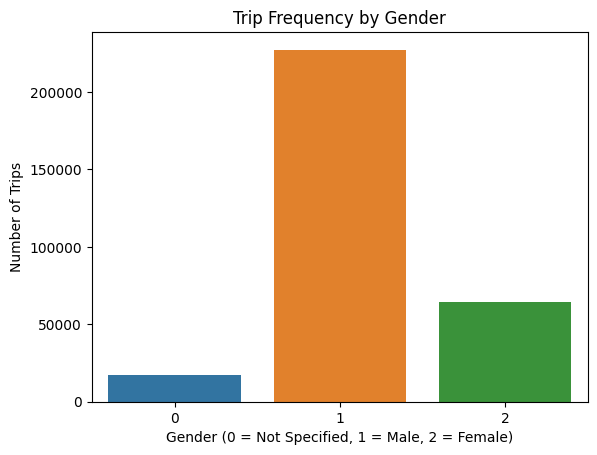

In [ ]:
# Count the number of trips for each gender
trip_count_by_gender = df_filtered['Gender'].value_counts()
print(trip_count_by_gender)

# Visualize with a bar plot
sns.barplot(x=trip_count_by_gender.index, y=trip_count_by_gender.values)
plt.title('Trip Frequency by Gender')
plt.xlabel('Gender (0 = Not Specified, 1 = Male, 2 = Female)')
plt.ylabel('Number of Trips')
plt.show()

       Trip Duration  Start Station ID  Start Station Latitude  \
count  309029.000000     309029.000000           309029.000000   
mean      428.314883       3207.232318               40.723184   
std       257.843141         27.019670                0.007965   
min        61.000000       3183.000000               40.692640   
25%       237.000000       3186.000000               40.717732   
50%       353.000000       3202.000000               40.721525   
75%       558.000000       3211.000000               40.727596   
max      1269.000000       3426.000000               40.752559   

       Start Station Longitude  End Station ID  End Station Latitude  \
count            309029.000000   309029.000000         309029.000000   
mean                -74.046521     3204.413518             40.722537   
std                   0.011002       41.759739              0.007599   
min                 -74.096937      152.000000             40.692640   
25%                 -74.050656     3186.00000

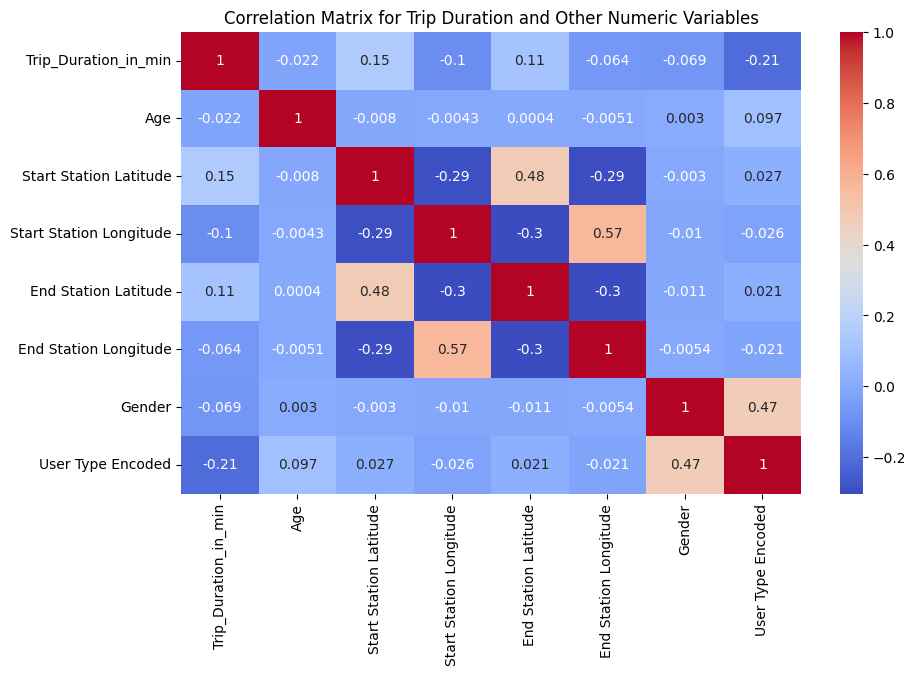

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Добавим столбец 'Age' на основе 'Birth Year'
df['Age'] = 2017 - df['Birth Year']
df['User Type Encoded'] = df['User Type'].map({'Subscriber': 1, 'Customer': 0})

# Проверим числовые столбцы
print(df.describe())

# Матрица корреляции для числовых столбцов
correlation_matrix = df[['Trip_Duration_in_min', 'Age', 'Start Station Latitude', 
                         'Start Station Longitude', 'End Station Latitude', 'End Station Longitude','Gender','User Type Encoded']].corr()

# Построим тепловую карту
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix for Trip Duration and Other Numeric Variables")
plt.show()


User Type  Customer  Subscriber
Gender                         
0             12142        5408
1                18      227183
2                 4       64274


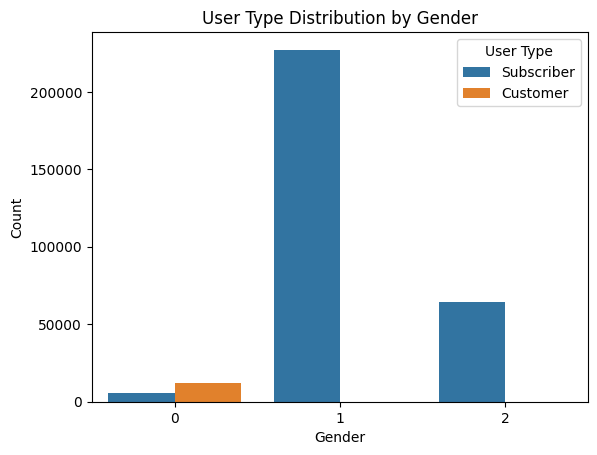

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cross-tabulation of User Type and Gender
cross_tab = pd.crosstab(df['Gender'], df['User Type'])
print(cross_tab)

# Plot the relationship
sns.countplot(x='Gender', hue='User Type', data=df)
plt.title("User Type Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="User Type")
plt.show()


**Why Correlation = 0.47?**
The moderate positive correlation (0.47) between Gender and User Type Encoded makes sense because:

Males (1) and Females (2) are predominantly Subscribers (User Type = 1).
Unknown (0) users have a relatively high proportion in the Customer (User Type = 0) category.


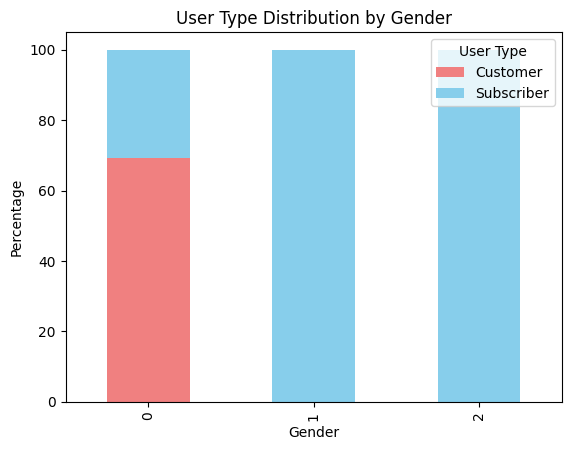

In [ ]:
# Cross-tabulation for stacked bar plot
cross_tab = pd.crosstab(df['Gender'], df['User Type'])

# Normalize for percentages
cross_tab_percentage = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

# Plot a stacked bar chart
cross_tab_percentage.plot(kind='bar', stacked=True, color=['lightcoral', 'skyblue'])
plt.title("User Type Distribution by Gender")
plt.ylabel("Percentage")
plt.xlabel("Gender")
plt.legend(title="User Type", labels=["Customer", "Subscriber"])
plt.show()


In [ ]:
# Add a new column to check if start and end stations are the same
df['Same Station'] = df['Start Station ID'] == df['End Station ID']

# Calculate the percentage of trips where the start and end stations are the same
same_station_percentage = df['Same Station'].mean() * 100

# Print the result
print(f"Percentage of trips with the same start and end stations: {same_station_percentage:.2f}%")


Percentage of trips with the same start and end stations: 2.42%


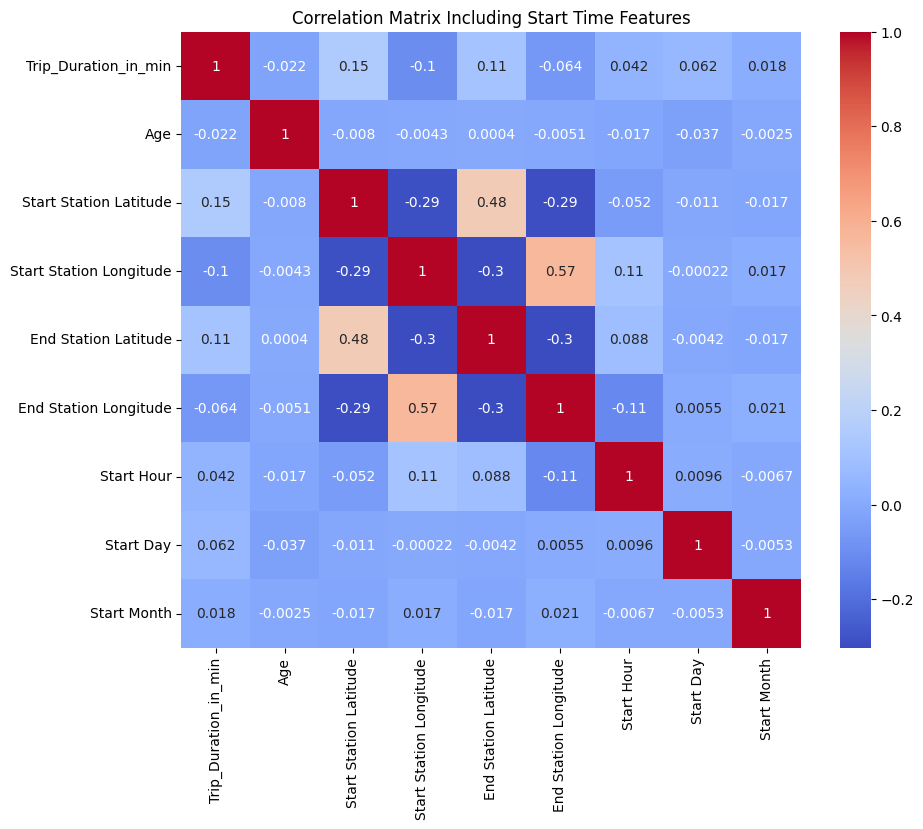

In [ ]:
df['Start Time'] = pd.to_datetime(df['Start Time'])

# Extract numerical features from Start Time
df['Start Hour'] = df['Start Time'].dt.hour          # Hour of the day
df['Start Day'] = df['Start Time'].dt.dayofweek      # Day of the week (0=Monday, 6=Sunday)
df['Start Month'] = df['Start Time'].dt.month        # Month of the year

# Recalculate the correlation matrix
correlation_matrix = df[['Trip_Duration_in_min', 'Age', 'Start Station Latitude', 
                         'Start Station Longitude', 'End Station Latitude', 
                         'End Station Longitude', 'Start Hour', 'Start Day', 'Start Month']].corr()

# Visualize the updated correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Including Start Time Features")
plt.show()

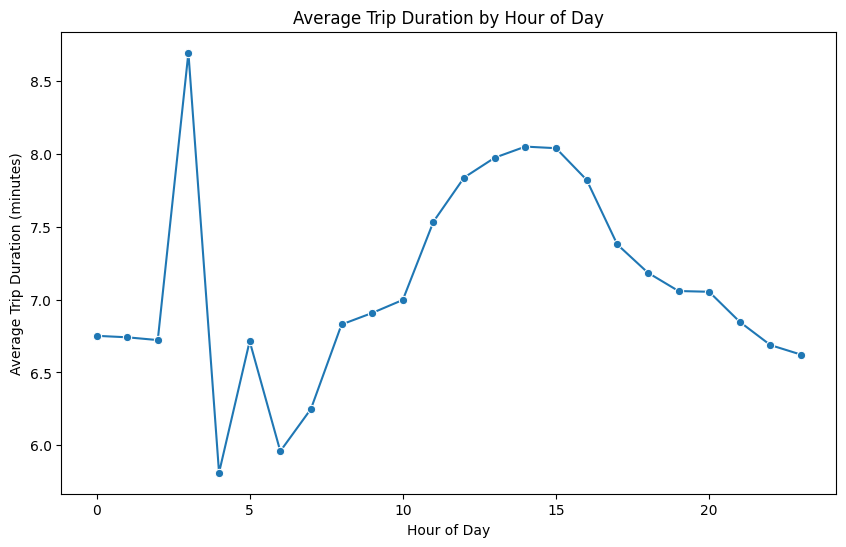

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by hour and calculate average trip duration
avg_duration_hour = df.groupby('Start Hour')['Trip_Duration_in_min'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_duration_hour.index, y=avg_duration_hour.values, marker='o')
plt.title("Average Trip Duration by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Trip Duration (minutes)")
plt.show()


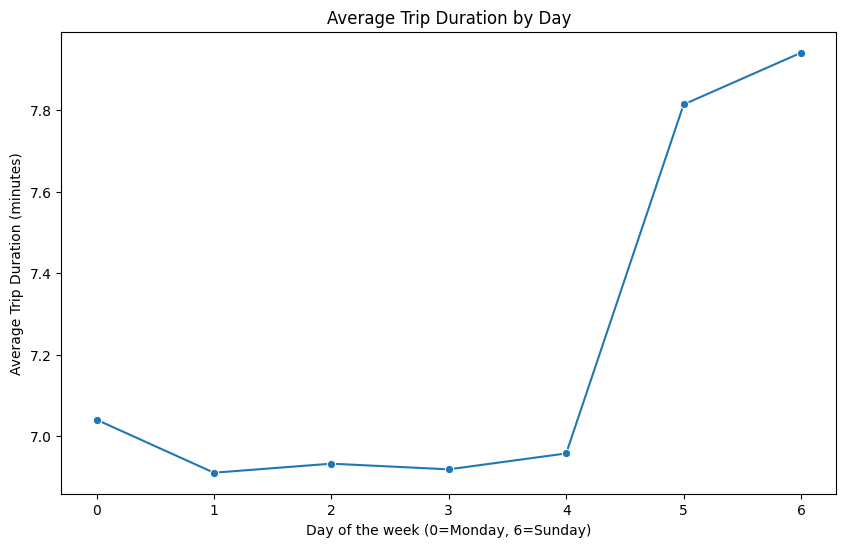

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by hour and calculate average trip duration
avg_duration_hour = df.groupby('Start Day')['Trip_Duration_in_min'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_duration_hour.index, y=avg_duration_hour.values, marker='o')
plt.title("Average Trip Duration by Day")
plt.xlabel("Day of the week (0=Monday, 6=Sunday)")
plt.ylabel("Average Trip Duration (minutes)")
plt.show()


To have actual days of week in x axis, we have to create a mapping:

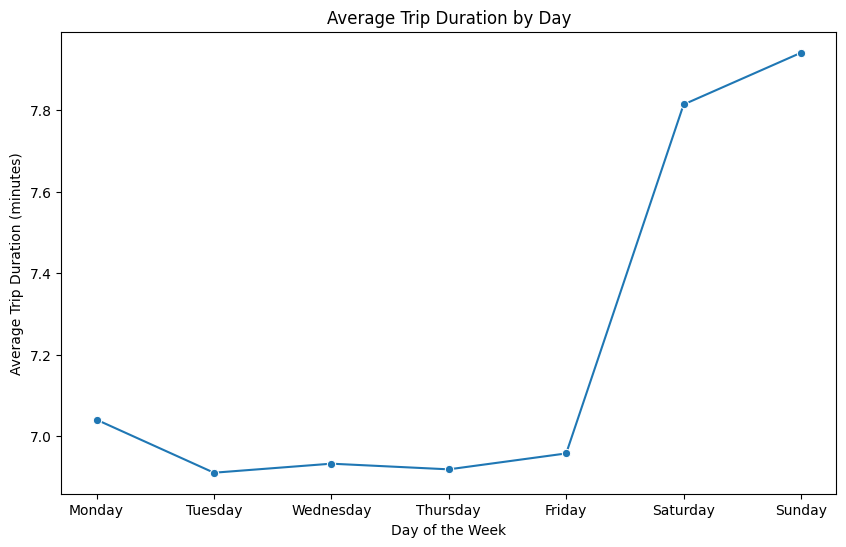

In [ ]:
# Group by day and calculate average trip duration
df['Start Time'] = pd.to_datetime(df['Start Time'])
day_mapping = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday"
}
df['Day Name'] = df['Start Day'].map(day_mapping)

avg_duration_day = df.groupby('Day Name')['Trip_Duration_in_min'].mean()

# Sort days in weekday order
avg_duration_day = avg_duration_day.reindex(["Monday", "Tuesday", "Wednesday", 
                                             "Thursday", "Friday", "Saturday", "Sunday"])

# Plot the results
plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_duration_day.index, y=avg_duration_day.values, marker='o')
plt.title("Average Trip Duration by Day")
plt.xlabel("Day of the Week")
plt.ylabel("Average Trip Duration (minutes)")
plt.show()


C:\Users\Workstation\AppData\Local\Temp\ipykernel_47348\953801980.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_duration_day.index, y=avg_duration_day.values, palette="viridis")


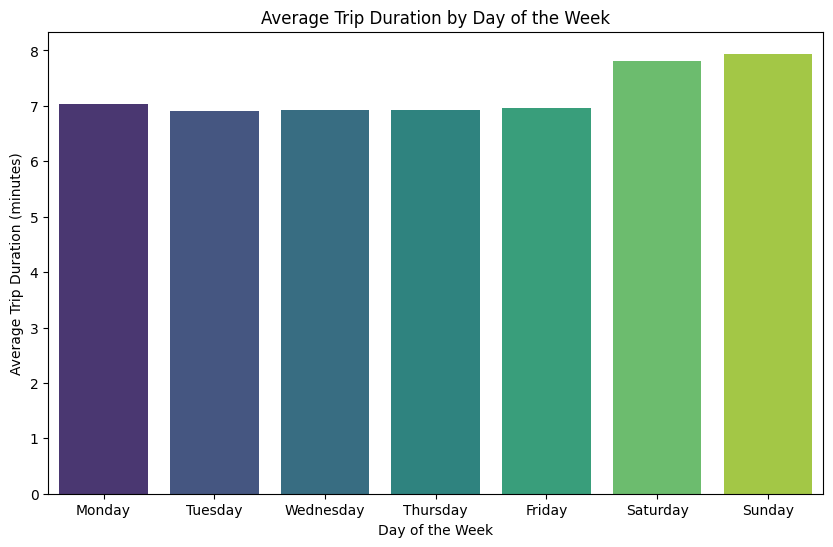

In [ ]:
# Assuming Start Time is already a datetime column
df['Start Time'] = pd.to_datetime(df['Start Time'])

df_filtered['Start Time'] = pd.to_datetime(df['Start Time'])
df_filtered['Start Day'] = df['Start Time'].dt.dayofweek  # 0 = Monday, 6 = Sunday

# Map numeric days to day names
day_mapping = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday"
}
df['Day Name'] = df['Start Day'].map(day_mapping)

# Group by day name and calculate average trip duration
avg_duration_day = df.groupby('Day Name')['Trip_Duration_in_min'].mean()

# Sort days in weekday order
avg_duration_day = avg_duration_day.reindex(["Monday", "Tuesday", "Wednesday", 
                                             "Thursday", "Friday", "Saturday", "Sunday"])

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_duration_day.index, y=avg_duration_day.values, palette="viridis")
plt.title("Average Trip Duration by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Trip Duration (minutes)")
plt.show()